# ${}^{4}{\rm He}$

The interaction is defined in `helium4.py`. It is nonlocal, and so is the counterterm. We will use it to tune the scattering length over a range of short-distance cutoffs, $R$.

In [1]:
import numpy as np
from scipy import optimize

import mu2

import helium4plus as he4

In [4]:
ELL = 0
R_MAX = he4.BETA6/2
R_MIN = he4.BETA6/8
nR = 50
Rs = 2/np.linspace(2/R_MAX, 2/R_MIN, nR)
gs = np.empty(nR)
b2s = np.empty(nR)
r0s = np.empty(nR)

In [5]:
momenta = np.linspace(0.01/he4.BETA6, 0.3/he4.BETA6, 30)
X = he4.FACTOR * he4.BETA6 # K•Å^3

def inverse_a0_diff(g, sys):
    a0, _ = sys.a0_and_r0(g, 0, momenta, use_c=True)
    return np.abs((1/he4.A0 - 1/a0)*he4.A0)

In [6]:
s = he4.Helium4System(Rs[0], ELL)

In [7]:
guess = 760*X
s.a0_and_r0(guess, 0, momenta, use_c=True), s.bound_state_spectrum(guess, 0)

((106.06275934159724, 8.66882082140409), array([-0.00117789]))

In [8]:
for i in range(nR):
    R = Rs[i]
    s = he4.Helium4System(R, ELL)
    result = optimize.fsolve(inverse_a0_diff, guess, args=(s), factor=0.1)
    g = result[0]
    a0, r0 = s.a0_and_r0(g, 0, momenta)
    
    if np.abs((he4.A0 - a0)/he4.A0) < 1e-4:
        e2s = s.bound_state_spectrum(g, 0)
        gs[i] = g
        r0s[i] = r0
        b2s[i] = np.abs(e2s[0])
        print(f'i = {i}  R = {R}  g = {g/X:.4e} X  a0 = {a0:.4e}  r0 = {r0:.4e}  b2 = {np.abs(e2s[0])}')
    else:
        break

i = 0  R = 2.770625  g = 7.5869e+02 X  a0 = 1.0000e+02  r0 = 8.6430e+00  b2 = 0.0013322182695371617
i = 1  R = 2.61078125  g = 1.3443e+03 X  a0 = 1.0000e+02  r0 = 8.3969e+00  b2 = 0.0013281185293907078


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [9]:
restart = 2
s = he4.Helium4System(Rs[restart], ELL)

In [10]:
guess = -2200*X
inverse_a0_diff(guess, s)

0.01836023452546076

In [11]:
for i in range(restart, nR):
    R = Rs[i]
    s = he4.Helium4System(R, ELL)
    result = optimize.fsolve(inverse_a0_diff, guess, args=(s), factor=0.1)
    g = result[0]
    a0, r0 = s.a0_and_r0(g, 0, momenta)
    
    if np.abs((he4.A0 - a0)/he4.A0) < 1e-4:
        e2s = s.bound_state_spectrum(g, 0)
        gs[i] = g
        r0s[i] = r0
        b2s[i] = np.abs(e2s[0])
        print(f'i = {i}  R = {R}  g = {g/X:.4e} X  a0 = {a0:.4e}  r0 = {r0:.4e}  b2 = {np.abs(e2s[0])}')
    else:
        break

i = 2  R = 2.468375  g = -2.2334e+03 X  a0 = 1.0000e+02  r0 = 8.2035e+00  b2 = 0.0013249316806918624
i = 3  R = 2.3407004310344828  g = 1.2789e+02 X  a0 = 1.0000e+02  r0 = 8.0559e+00  b2 = 0.0013225157318995408
i = 4  R = 2.2255840163934426  g = 4.8849e+02 X  a0 = 1.0000e+02  r0 = 7.9468e+00  b2 = 0.0013207409454499127
i = 5  R = 2.121259765625  g = 7.1293e+02 X  a0 = 1.0000e+02  r0 = 7.8695e+00  b2 = 0.0013194888132175375
i = 6  R = 2.0262779850746266  g = 9.0725e+02 X  a0 = 1.0000e+02  r0 = 7.8177e+00  b2 = 0.0013186510772197817
i = 7  R = 1.9394375  g = 1.0972e+03 X  a0 = 1.0000e+02  r0 = 7.7855e+00  b2 = 0.0013181293021764474
i = 8  R = 1.859734589041096  g = 1.2924e+03 X  a0 = 1.0000e+02  r0 = 7.7673e+00  b2 = 0.001317835075655582
i = 9  R = 1.7863240131578948  g = 1.4979e+03 X  a0 = 1.0000e+02  r0 = 7.7584e+00  b2 = 0.0013176906833826637
i = 10  R = 1.718488924050633  g = 1.7167e+03 X  a0 = 1.0000e+02  r0 = 7.7547e+00  b2 = 0.0013176299013805365
i = 11  R = 1.6556173780487806  g 

In [12]:
restart = 20
s = he4.Helium4System(Rs[restart], ELL)

In [13]:
guess = 5200*X
inverse_a0_diff(guess, s)

0.01259535000653067

In [14]:
for i in range(restart, nR):
    R = Rs[i]
    s = he4.Helium4System(R, ELL)
    result = optimize.fsolve(inverse_a0_diff, guess, args=(s), factor=0.1)
    g = result[0]
    a0, r0 = s.a0_and_r0(g, 0, momenta)
    
    if np.abs((he4.A0 - a0)/he4.A0) < 1e-4:
        e2s = s.bound_state_spectrum(g, 0)
        gs[i] = g
        r0s[i] = r0
        b2s[i] = np.abs(e2s[0])
        print(f'i = {i}  R = {R}  g = {g/X:.4e} X  a0 = {a0:.4e}  r0 = {r0:.4e}  b2 = {np.abs(e2s[0])}')
        guess = g
    else:
        break

i = 20  R = 1.2455103211009175  g = 5.1996e+03 X  a0 = 1.0000e+02  r0 = 7.6083e+00  b2 = 0.001315285880352991
i = 21  R = 1.2121484375  g = 5.8077e+03 X  a0 = 1.0000e+02  r0 = 7.5814e+00  b2 = 0.0013148580879114012
i = 22  R = 1.1805271739130434  g = 6.5556e+03 X  a0 = 1.0000e+02  r0 = 7.5553e+00  b2 = 0.0013144439718564343
i = 23  R = 1.1505137711864406  g = 7.5685e+03 X  a0 = 1.0000e+02  r0 = 7.5308e+00  b2 = 0.0013140552682653916
i = 24  R = 1.1219886363636362  g = 9.2384e+03 X  a0 = 1.0000e+02  r0 = 7.5085e+00  b2 = 0.0013137010988759723
i = 25  R = 1.0948437500000001  g = 1.3771e+04 X  a0 = 1.0000e+02  r0 = 7.4887e+00  b2 = 0.0013133877981876085


In [15]:
restart = 26
s = he4.Helium4System(Rs[restart], ELL)

In [16]:
guess = -40000*X
inverse_a0_diff(guess, s)

0.015644491375171876

In [17]:
for i in range(restart, nR):
    R = Rs[i]
    s = he4.Helium4System(R, ELL)
    result = optimize.fsolve(inverse_a0_diff, guess, args=(s), factor=0.1)
    g = result[0]
    a0, r0 = s.a0_and_r0(g, 0, momenta)
    
    if np.abs((he4.A0 - a0)/he4.A0) < 1e-4:
        e2s = s.bound_state_spectrum(g, 0)
        gs[i] = g
        r0s[i] = r0
        b2s[i] = np.abs(e2s[0])
        print(f'i = {i}  R = {R}  g = {g/X:.4e} X  a0 = {a0:.4e}  r0 = {r0:.4e}  b2 = {np.abs(e2s[0])}')
        guess = g
    else:
        break

i = 26  R = 1.0689812992125984  g = -4.1266e+04 X  a0 = 1.0000e+02  r0 = 7.4717e+00  b2 = 0.0013131189195540842
i = 27  R = 1.0443125  g = 1.4452e+03 X  a0 = 1.0000e+02  r0 = 7.4576e+00  b2 = 0.0013128959840980126
i = 28  R = 1.0207565789473683  g = 4.6810e+03 X  a0 = 1.0000e+02  r0 = 7.4463e+00  b2 = 0.0013127175726384262
i = 29  R = 0.9982398897058824  g = 6.2249e+03 X  a0 = 1.0000e+02  r0 = 7.4377e+00  b2 = 0.0013125809971659915
i = 30  R = 0.9766951438848921  g = 7.3239e+03 X  a0 = 9.9999e+01  r0 = 7.4310e+00  b2 = 0.0013125035883857887
i = 31  R = 0.9560607394366198  g = 8.2548e+03 X  a0 = 1.0000e+02  r0 = 7.4272e+00  b2 = 0.0013124154584529771
i = 32  R = 0.9362801724137931  g = 9.1145e+03 X  a0 = 1.0000e+02  r0 = 7.4247e+00  b2 = 0.0013123754674257073
i = 33  R = 0.9173015202702703  g = 9.9462e+03 X  a0 = 1.0000e+02  r0 = 7.4234e+00  b2 = 0.0013123560076477867
i = 34  R = 0.8990769867549668  g = 1.0773e+04 X  a0 = 1.0000e+02  r0 = 7.4231e+00  b2 = 0.0013123510814351696
i = 35  R

In [18]:
import matplotlib.pyplot as plt

plt.style.use('science')
gr = 4/3
h = 3

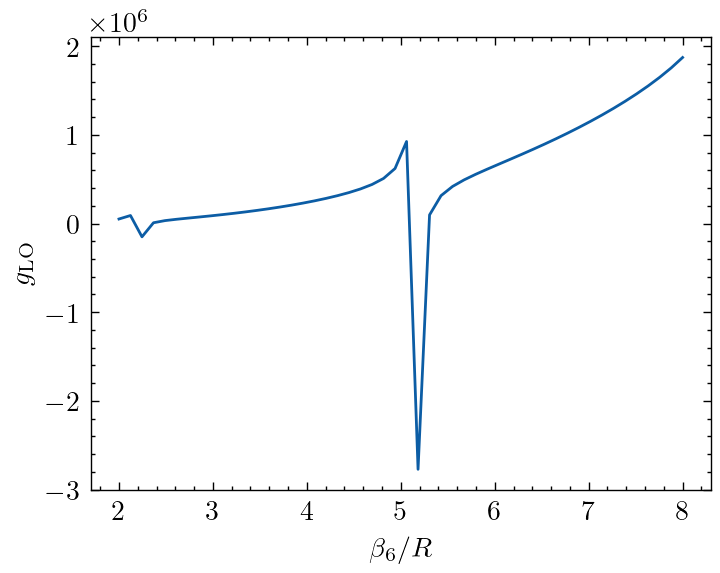

In [19]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

ax.plot(he4.BETA6/Rs, gs)

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$g_{\rm LO}$');

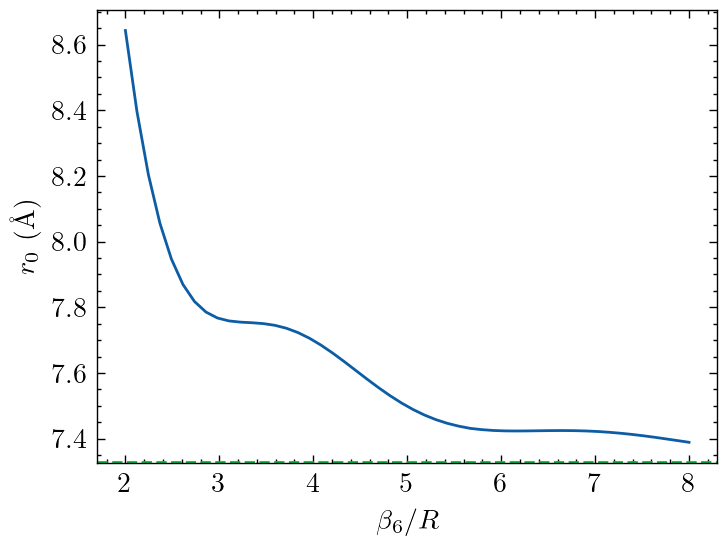

In [20]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

ax.plot(he4.BETA6/Rs, r0s)
ax.axhline(he4.R0, color='C1', linestyle='--')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$r_0$ (Å)');

In [21]:
np.savetxt('datfiles/he4plus_LO_nonlocal_rg_flow.txt', np.vstack((Rs, gs)).T, header='R (Å)  g ()')

In [22]:
np.savetxt('datfiles/he4plus_LO_nonlocal_r0s.txt', np.vstack((Rs, r0s)).T, header='R (Å)  r_0 (Å)')